In [97]:
import numpy as np
import keras
import warnings
from matplotlib import pyplot as plt
import cv2
warnings.filterwarnings('ignore')
from keras.applications.vgg16 import preprocess_input

In [98]:
def image_process(img,r_size,c_size):
    scaled_image = cv2.resize(img, (r_size, c_size))
    rot_image = np.rot90(scaled_image,-1)
    return rot_image

In [99]:
dire = '/users/xjing/Desktop/GitHub/T-Mobile_Hackathon/finger/'
filename = 'FiveOpen.MOV'

In [100]:
def extract_image_data(dire = dire, filename = filename,r_size=224,c_size=224):
    file = dire+ filename
    vidcap = cv2.VideoCapture(file)
    success,image = vidcap.read()
    flag = True
    image_list = []
    cnt = 0
    while flag:
        flag,img = vidcap.read()
        if flag:
            image_list += [image_process(img,r_size,c_size)]
            cnt += 1
    return image_list

In [101]:
image_list = extract_image_data(dire,filename)
print(image_list[0].shape)
print(len(image_list))

(224, 224, 3)
294


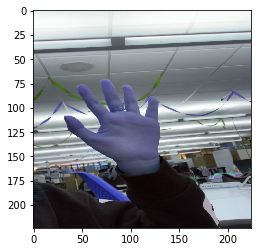

In [102]:
imgplot = plt.imshow(image_list[0])

In [103]:
image_dataset = []
category_dataset = []
cat = 0
proj = {}
for filename in ['FiveOpen.MOV','ok.MOV']:
    image_list = extract_image_data(dire,filename)
    image_dataset += image_list
    category_dataset += [cat for _ in image_list]
    proj[cat] = filename.split('.')[0]
    cat += 1
image_dataset = np.asarray(image_dataset)
category_dataset = np.asarray(category_dataset)
category_dataset = keras.utils.to_categorical(category_dataset)

In [104]:
print(image_dataset.shape)

(745, 224, 224, 3)


In [105]:
print(category_dataset.shape)

(745, 2)


In [92]:
from sklearn.model_selection import train_test_split

dat_train, dat_test, y_train, y_test = train_test_split(image_dataset, category_dataset, test_size=0.2, random_state=42, stratify=category_dataset)

ModuleNotFoundError: No module named 'sklearn.model_selection'

In [61]:
from keras import models, layers, optimizers
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras import models

In [106]:
r_size=224
c_size=224
model = keras.applications.MobileNet(include_top=False, 
                                                  weights='imagenet', 
                                                  input_shape=(r_size, c_size, 3), 
                                                  pooling=None)

In [107]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [110]:
%%time
processed_input = model.predict(image_dataset)

CPU times: user 2min 32s, sys: 16.1 s, total: 2min 48s
Wall time: 5.87 s


In [111]:
print(image_dataset[0].shape)
print(processed_input.shape)

(224, 224, 3)
(745, 7, 7, 1024)


In [117]:
top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=(7, 7, 1024)))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(64, activation='relu'))
top_model.add(layers.Dense(2, activation='softmax'))

top_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
top_model.fit(processed_input, category_dataset, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
745/745 [==============================] - 4s 6ms/step - loss: 1.9847 - acc: 0.8094
Epoch 2/10
745/745 [==============================] - 0s 505us/step - loss: 0.0015 - acc: 1.0000
Epoch 3/10
745/745 [==============================] - 0s 461us/step - loss: 0.0116 - acc: 0.9973
Epoch 4/10
745/745 [==============================] - 0s 470us/step - loss: 0.0024 - acc: 0.9987
Epoch 5/10
745/745 [==============================] - 0s 513us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
745/745 [==============================] - 0s 460us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
745/745 [==============================] - 0s 468us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
745/745 [==============================] - 0s 467us/step - loss: 0.0039 - acc: 0.9987
Epoch 9/10
745/745 [==============================] - 0s 465us/step - loss: 0.0588 - acc: 0.9960
Epoch 10/10
745/745 [==============================] - 0s 478us/step - loss: 0.0178 - acc: 0.9987


In [119]:
pred = [proj[i] for i in top_model.predict_classes(processed_input)]

In [120]:
print(pred)

['FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'Fi